# Observations of relativistically moving components


For components (aka 'blobs) with 'bulk' Lorentz factor $\Gamma \geq 1$ (not to be confused with the Lorentz factors of the individual electrons spiralling in the magnetic field, which can be much higher) we need to apply special relativistic corrections, which affect both the observed flux and the time evolution of the observed emission. In a nutshell, an approaching component appears brighter and to evolve faster, and a receding component is fainter and more slowly evolving. In reality, two-sided symmetric ejections (such as jets) can have _both_ components behaving as if they were receding, due to time dilation (more this below); i.e. 'a' and 'r' subscripts refer to approaching and receding.

The Lorentz factor is given by:

$$\Gamma = (1 - \beta^2)^{-1/2}$$

where $\beta = v / c$ is the speed as a fraction of the speed of light.

The relativistic Doppler factor is given by 

$$\delta_{a,r} = \Gamma^{-1} (1 \mp \beta \cos \theta)^{-1}$$

where $\theta$ is the angle of the ejecta to the line of sight, such that $\theta=0$ is coming right at you, and $\theta=90^{\circ}$ is in the plane of the sky. The $\mp$ refers to the approaching and receding conditions, respectively (useful for symmetric jet ejections, as discussed above).

If you play around with $\delta$ you can see that it is possible for a two-sided ejection to have $\delta < 1$ for both approaching and receding sides, due to the time dilation ($\Gamma^{-1}$) term (see for example the case of the galactic relativistic jet source GRS 1915+105 in Fender, Garrington et al. MNRAS 1999, or the classic example of the Doppler-shifted emission lines from SS 433 which can both be redshifted when the jets are close to the plane of the sky, e.g. Margon ARA&A 1984). 

## Doppler boosting

The Doppler factor is crucial in determining both the apparent flux and arrival time of the emission from the emitting component(s). The rest frame flux $f_0$ is adjusted to the observed flux as

$$f_{a,r} = f_0 \delta_{a,r}^{3-\alpha}$$

where $\alpha$ is the spectral index of the emitting region.

The $\delta^3$ term is the relativistic aberration or 'Doppler boosting' term from classical special relativity. The further $\delta^{-\alpha}$ term arises from the fact that at observing (telescope) frequency $\nu_{obs}$, you will be observing radiation emitted in its rest frame at a frequency $\nu_{rest} = \nu_{obs} \delta^{-1}$. If there is a single power-law spectrum with spectral index $+\alpha$ (beware again the dichotomy in definitions of spectral index!), between the two frequencies, then the flux at $\nu_{rest} = \nu \delta^{-\alpha}$. 


It should be stressed that this $\alpha$ term is an oversimplification which only works if the rest and observed frequencies are on a single power-law part of the spectrum. If they are not then the rest frame flux at $\nu_{rest}$ must be obtained from the spectral model (by shifting the frequencies by $\delta$) and then boosted.

## Arrival times

Once the evolution of the source is in a frame moving relativistically with respect to us, the observers, we must also apply the Doppler correction to the arrival times (there is more subtlety to this statement that you might think - if for example you have a sequence of relativistic ejections connected to events in the accretion flow, if you blindly apply the below corrections to the whole radio light curve you can end up having ejections being observed before the _rest frame_ accretion event which triggered them).

In an infinitesimal interval of time $\Delta t$ in the rest frame of the source, we will observe a time interval to pass of $\Delta t \delta^{-1}$, i.e. divided by the Doppler factor. The total time $t_{obs}$ in the observer frame until an event at $t_{rest}$ in the rest frame of the source is therefore

$$t_{obs} = \int_{t_0}^{t_{rest}} \delta^{-1} dt$$

where $t_0$ is the ('launch') moment at which the ejecta began moving relativistically. In the case of constant $\delta$ (i.e. constant speed and Lorentz factor) and setting $t_0 = 0$ then this trivially becomes $t_{obs} = t_{rest} \delta^{-1}$ (see e.g. Tetarenko et al. 2017). However, in the case where the Lorentz factor is changing, i.e. the source is accelerating or decelerating this simplified expression _cannot_ be used and if used will cause some highly incorrect results. In such cases the integration must be performed.

We may also consider the apparent motion of the approaching and receding sources on the sky, in the general case of a varying jet speed. The equations of _superluminal motion_ determine what the apparent speed of a source on the plane of the sky (i.e. the angular motion as observed by telescopes such as radio interferometers) is:

$$\beta_{apparent. a,r} = \frac{\beta \sin \theta}{1 \mp \beta \cos \theta}$$

The apparent distance travelled by the source over a time $\Delta t$ is therefore

$$d = \int_{t_0}^{\Delta t} \beta_{apparent} dt$$

which again simplifies to $d = \beta \Delta t$ for unaccelerated motion, but must be calculated explicitly otherwise.

It is well known, and feels intuitively correct, that emission seen at equal _angular distances_ from the launch site on the receding and approaching sides is of the same intrinsic age. In other words, tests of Doppler boosting, which may reveal the symmetry of the ejecta, need to be performed by comparison of components at equal angular distances.

We can show that this is true as follows: As shown above, emission at the same intrinsic age $t_{rest}$ will arrive at the telescope at times $t_{a,r} = t_{rest} \delta_{a,r}^{-1}$ (in the simple case of no acceleration), i.e. a ratio of arrival times of 

$$\frac{t_a}{t_r} = \frac{\delta_r}{\delta_a} = \frac{(1 - \beta \cos \theta)}{(1 + \beta \cos \theta)}$$

The apparent distances travelled by approaching and receding components at the same rest-frame time would therefore have been $d_{a,r} = \beta_{a,r} t_{a,r}$, and their ratio

$$\frac{d_a}{d_r} = \frac{\beta_a}{\beta_r} \frac{t_a}{t_r} = \frac{(1+\beta \cos \theta)}{(1-\beta \cos \theta)} \frac{(1 - \beta \cos \theta)}{(1 + \beta \cos \theta)} = 1$$

### Other notes

1. Superluminal motion does not, as stated in several reference texts, require a small angle to line of sight.

2. It is often also stated that for a source at Lorentz factor $\Gamma$ you can only see the emission when within an angle $\Gamma^{-1}$ radians of the motion; this is of course an approximation the peak of the Doppler factor and it is a much broader function, see the plots made below.

3. Deceleration of a relativistically moving component can cause late-time peaks in the light curve which could be misinterpreted as a new shock or other rebrightening phenomenon.



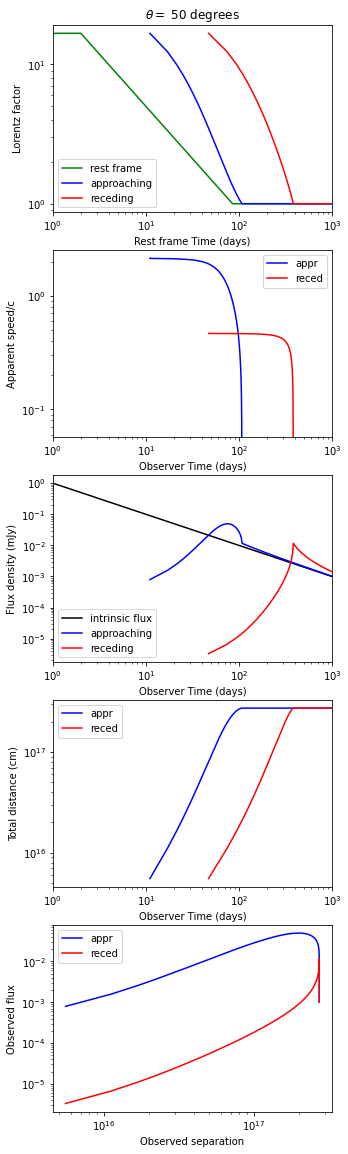

In [155]:

import matplotlib
import matplotlib.pyplot as plt
import sys
# the magic command which makes all the plots appear inline in the notebook
%matplotlib inline 
import numpy as np
import math

c=3.0e10
day=86400.0

# relativistic doppler factor, in the end 
def dopp (gamma, beta, theta):
    d=1/(gamma*(1-(beta*math.cos(theta))))
    return d

# beta from gamma
def bfromg (gamma):
    b=(1-(gamma**-2))**0.5
    return b

# in most of the following a two-sided ejection is assumed
# so variables ending in (a,r) correspond to (approaching, receding) components

# most variables derive from t, which is a np.array, and so they are also

# spectral index
spindex=-0.6

# angle to line of sight (in radians)
thetadeg=50 # you can enter this as an integer, next line makes real
theta=thetadeg/57.3

# initial Lorentz factor and rate of decrease with each time step
gammainit=5.0

# the common approximation to the 'critical viewing angle'
# (of course it is not so simple, its just the variation of Doppler factor,
# but we can use this as an illustrative point in the plot if we like)
gcrit=1/theta

tmax=1000
nsteps=1000
t=np.linspace(1.0,tmax,nsteps) #each step is one unit of time

# put here your model for Lorentz factor deceleration
# gamma=gammainit/(decr**t)

# put here your model for Lorentz factor deceleration
# this model is GRB, adiabatic, ISM
start=1.0
# gamma=gammainit/((t/start)**(+3.0/8.0)) # decelerating
# gamma=gammainit/((t/start)**(-3.0/8.0)) # accelerating (unphysical)

# slower deceleration
gamma=gammainit/(((t/10.0)**(+3.0/8.0))**2.0)

# absurd example to illustrate insensitivity 
# gamma=10.0+9.0*np.sin(t/20)

# try to remove the early time discontinuities before decel starts
doppainit=dopp(gammainit,bfromg(gammainit),theta)
dopprinit=dopp(gammainit,bfromg(gammainit),(theta+np.pi))
firsta=start/doppainit
firstr=start/dopprinit

# gamma[gamma>gammainit]=gammainit # comment this for accelerating
gamma[gamma<1]=1 # this stops Lorentz factor dropping below 1

# flux evolution:
finit=1.0
f=finit/(t**1.0) # this is the rest-frame flux decay of the source
# f=finit/(t**0.0) <- if you just set it constant you can explore how Doppler factor alone affects fluxes etc
# you need to include the 't' variable to set up the array


beta=bfromg(gamma)
doppa=dopp(gamma,beta, theta) # approaching Doppler factor
doppr=dopp(gamma,beta, (theta+np.pi)) # receding (symmetric)

power=3-spindex # doppler boost power
fluxa=f*(doppa**power)
fluxr=f*(doppr**power)

ftot=fluxa+fluxr # total flux from source

tconst=(tmax/nsteps)# rest-frame time interval size

ta=tconst/doppa
tr=tconst/doppr # units for numerical sum, into an array of doppler-shifted time intervals

# these arrays are the apparent (to observer) passage of time of each blob, per interval
# total apparent time times
tta=np.zeros(nsteps)
ttr=np.zeros(nsteps)

# apparent velocities as a function of time
ba=(beta * np.sin(theta))/(1-(beta*np.cos(theta)))
br=(beta * np.sin(theta))/(1+(beta*np.cos(theta)))

# multiplying by day constant here makes time intervals days
dba=ba*c*tconst*day
dbr=ba*c*tconst*day

dda=np.zeros(nsteps)
ddr=np.zeros(nsteps)

for x in range(nsteps-1):
    tta[x]=np.sum(ta[0:x])+1 # the +1 is to stop a jump from zero (numerical tweak, not physics)
    ttr[x]=np.sum(tr[0:x])+1
    dda[x]=np.sum(dba[0:x])
    ddr[x]=np.sum(dbr[0:x])
    
# small tweaks to stop plots have numerical errors at start and end
tta[nsteps-1]=tta[nsteps-2]
ttr[nsteps-1]=ttr[nsteps-2]

dda[nsteps-1]=dda[nsteps-2]
ddr[nsteps-1]=dda[nsteps-2]

tta[0]=tta[1]
ttr[0]=ttr[1]
fluxa[0]=fluxa[1]
fluxr[0]=fluxr[1]
dda[0]=dda[1]
ddr[0]=ddr[1]
gamma[0]=gamma[1]


##################################################

# plots
plt.figure(figsize=(5,20))

plt.subplot(5,1,1)
plt.xlim(1,tmax)

plt.xscale('log')
plt.yscale('log')

plt.plot(t,gamma,'g', label="rest frame")
plt.plot(tta,gamma,'b',label="approaching")
plt.plot(ttr,gamma,'r',label="receding")

#plt.axhline(y=gcrit, color='k', linestyle='--')

plt.xlabel("Rest frame Time (days)")
plt.ylabel("Lorentz factor")
plt.title(r'$\theta =$ %s degrees' % (thetadeg))
plt.legend()

##################################################

plt.subplot(5,1,2)
plt.xlim(1,tmax)
plt.xscale('log')
plt.yscale('log')

plt.plot(tta,ba,'b', label="appr")
plt.plot(ttr,br,'r', label="reced")

plt.xlabel("Observer Time (days)")
plt.ylabel("Apparent speed/c")
#plt.title('Apparent speed/c')
plt.legend()


##################################################

plt.subplot(5,1,3)
plt.xlim(1,tmax)
plt.xscale('log')
plt.yscale('log')

plt.plot(t,f,'k', label="intrinsic flux")
plt.plot(tta,fluxa,'b', label="approaching")
plt.plot(ttr,fluxr,'r', label="receding")
#plt.plot(t,flux3,'b', label="")
#plt.plot(t,ftot,'m', label="total")

plt.xlabel("Observer Time (days)")
plt.ylabel("Flux density (mJy)")
#plt.title('Observed flux evolution')
plt.legend()


##################################################

plt.subplot(5,1,4)
plt.xlim(1,tmax)
plt.xscale('log')
plt.yscale('log')

plt.plot(tta,dda,'b', label="appr")
plt.plot(ttr,ddr,'r', label="reced")

plt.xlabel("Observer Time (days)")
plt.ylabel("Total distance (cm)")
#plt.title('Observed trajectories')

plt.legend()

##################################################

plt.subplot(5,1,5)
plt.xscale('log')
plt.yscale('log')

plt.plot(dda,fluxa,'b', label="appr")
plt.plot(ddr,fluxr,'r', label="reced")

plt.xlabel("Observed separation")
plt.ylabel("Observed flux")
#plt.title('Observed trajectories')

# output a png and pdf with angle incorporated into name for easy sorting
plt.legend()
plt.savefig("offaxis%s.png" % thetadeg)
plt.savefig("offaxis%s.pdf" % thetadeg)
plt.show()



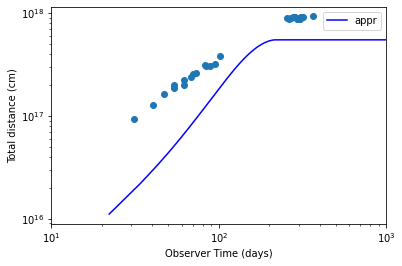

In [157]:
distkpc=2.2
AU=1.5e13
data1348=np.loadtxt('1348.dat')
data1348[:,1]=data1348[:,1]*distkpc*1000.0*AU

tta1348=tta*2
dda1348=dda*2

plt.subplot(1,1,1)
plt.xlim(10,tmax)
plt.xscale('log')
plt.yscale('log')

plt.plot(tta1348,dda1348,'b', label="appr")
plt.scatter(data1348[:,0],data1348[:,1])

plt.xlabel("Observer Time (days)")
plt.ylabel("Total distance (cm)")
#plt.title('Observed trajectories')

plt.legend()
plt.savefig("1348comparison.png")
plt.savefig("1348comparison.pdf")
plt.show()


In [118]:
data1348

array([[3.12000e+01, 1.26000e+17, 4.50000e-01],
       [4.02000e+01, 1.74600e+17, 4.30000e-01],
       [4.72000e+01, 2.20950e+17, 4.30000e-01],
       [5.39000e+01, 2.69550e+17, 1.90000e-01],
       [5.42000e+01, 2.51100e+17, 4.80000e-01],
       [6.19000e+01, 3.04650e+17, 1.00000e-02],
       [6.22000e+01, 2.71800e+17, 1.10000e-01],
       [6.82000e+01, 3.24900e+17, 4.40000e-01],
       [7.00000e+01, 3.43350e+17, 2.40000e-01],
       [7.32000e+01, 3.55500e+17, 4.30000e-01],
       [8.23000e+01, 4.22100e+17, 2.40000e-01],
       [8.35000e+01, 4.10850e+17, 1.80000e-01],
       [8.81000e+01, 4.13550e+17, 2.40000e-01],
       [9.51000e+01, 4.36050e+17, 3.10000e-01],
       [1.02000e+02, 5.22450e+17, 6.70000e-01],
       [2.55800e+02, 1.20330e+18, 4.50000e-01],
       [2.62700e+02, 1.19565e+18, 4.50000e-01],
       [2.68800e+02, 1.20240e+18, 4.70000e-01],
       [2.77600e+02, 1.23525e+18, 7.10000e-01],
       [2.85600e+02, 1.23300e+18, 5.30000e-01],
       [2.91500e+02, 1.19835e+18, 4.1000